<img src="img\giphy.gif"/>

# Human Resources Analytics
***
**“Human Resources isn’t a thing we do. It’s the thing that runs our business.”** – Steve Wynn, Wynn Las Vegas

- **What is the Business Problem?**

A multi-million-dollar company is about to go bankrupt and wants to know why its employees are leaving.

<img src="img\download.gif"/>

- **Who is the Client?**
<img src="img\ico_ceomessage.png" length=10% width=10%/>

- **What is Objective?**

My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not, as well as offering recommendations to the company regarding their human resources decisions.

- **What is the Approach?**

I’ll be following the *Cross Industry Standard Process for Data Mining*, commonly known by its acronym **CRISP-DM** while implementing the popular data science model **OSEMN** (pronounced as *awesome*).

1. [Data Understanding](#1.-Data-Understanding)

    a. [**O**btaining Data](#1a.-Obtaining-Data)
    
    b. [**S**crubbing Data](#1b.-Scrubbing-Data)
    
    c. [**E**xploring Data](#1c.-Exploring-Data)      
      - [Statistical Overview](#Statistical-Overview)
      - [Correlation Matrix & Heatmap](#Correlation-Matrix-&-Heatmap)
      - [Feature Importance](#Feature-Importance)
          - [via Random Forest](#Feature-Importance-via-Random-Forest)
          - [via Gradient Boosting](#Feature-Importance-via-Gradient-Boosting)

2. Data Preparation

    a. Feature Engineering
    
    b. Principle Component Analysis (PCA) & Scaling

3. **M**odeling

4. Evaluation

    a. I**n**terpreting Data
    
    b. Communicating Results 
***
- **OSEMN Model**
<img src="img\OSEMN.png" length=70% width=70%/>
***
- **CRISP Diagram**
<img src="img\newcrispdiagram.gif" length=40% width=40%/>

- **Dataset**

The dataset is provided by Kaggle’s <a href="https://www.kaggle.com/ludobenistant/hr-analytics">Human Resources Analytics</a>. It’s important to notice that the dataset is simulated.
***

# 1. Data Understanding
***
- The data understanding phase involves taking a closer look at the data available for mining. It implies accessing the data and exploring it using tables and graphics.

## 1a. Obtaining Data
***
- Let's import the necessary modules for data manipulation and visualization.

In [1]:
import pandas as pd # data processing, CSV file I/O
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
from collections import Counter

- Now let's read the analytics csv file and store our dataset into a dataframe called **hr_df**.

In [2]:
hr_df = pd.DataFrame.from_csv('data/HR_comma_sep.csv', index_col=None)

- It’s a great practice to always get a quick overview of what we are dealing with in our dataset.

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1b. Scrubbing Data
***
- Let’s check to see if there are any missing values in our dataset.

In [4]:
hr_df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

- Let's say we have more than 10 features, it would be hard to notice a *True* between too many *False*, so we run *any()* twice to run the *isnull()* check across all columns.

In [5]:
hr_df.isnull().any().any()

False

- We can also use the *Missingno* package which is a very useful and convenient tool in visualising missing values in the dataset.

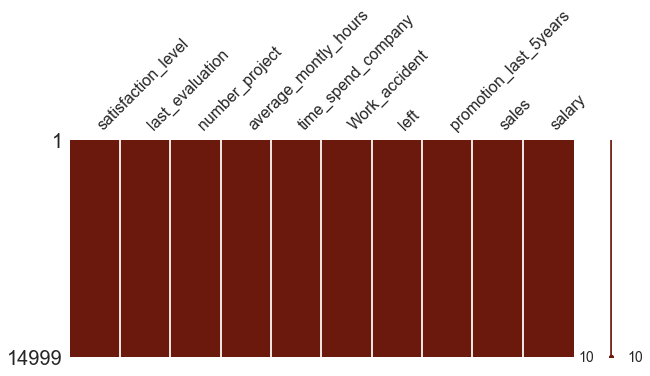

In [6]:
import missingno as msno
msno.matrix(df=hr_df, figsize=(10, 4), color=(0.42, 0.1, 0.05))

## 1c. Exploring Data
***
- Statistical Overview
- Correlation Matrix & Heatmap
- Feature Importance
- Distribution Plots
- 2D EDA
- 3D EDA
***
### Statistical Overview
***

In [7]:
rows = hr_df.shape[0]
columns = hr_df.shape[1]
print("The dataset contains {0} rows and {1} columns".format(rows, columns))

The dataset contains 14999 rows and 10 columns


- The dataset has about 15,000 employee observations and 10 features.

In [8]:
# Let's check the type of our features. 
print(hr_df.dtypes)
Counter(hr_df.dtypes.values)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


Counter({dtype('int64'): 6, dtype('float64'): 2, dtype('O'): 2})

- We have 2 categorical variables, 2 continuous variables, and 6 numeric discrete variables.
- The target variable *left* is binary, either 0 or 1.

In [9]:
# Let's display the statistical overview of the employees
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


***
- **Target variable inspection**

In [10]:
data = [go.Bar(
            x = hr_df.left.value_counts().index.values,
            y = hr_df.left.value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [11]:
turnover_rate = hr_df.left.value_counts() / hr_df.shape[0]
turnover_ratio = int(turnover_rate[0]/turnover_rate[1])
print ("- The company has a turnover rate of about {:.0%}.".format(turnover_rate[1]))
print ("- The turnover ratio is {}.".format(turnover_ratio))

- The company has a turnover rate of about 24%.
- The turnover ratio is 3.


- It's essential to note that when performing cross-validation, we have to maintain this turnover ratio.

In [12]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = hr_df.groupby('left')
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Correlation Matrix & Heatmap

- Correlation Matrix

In [13]:
corr = hr_df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


- Heatmap

- [color example code: colormaps_reference.py](https://matplotlib.org/examples/color/colormaps_reference.html)

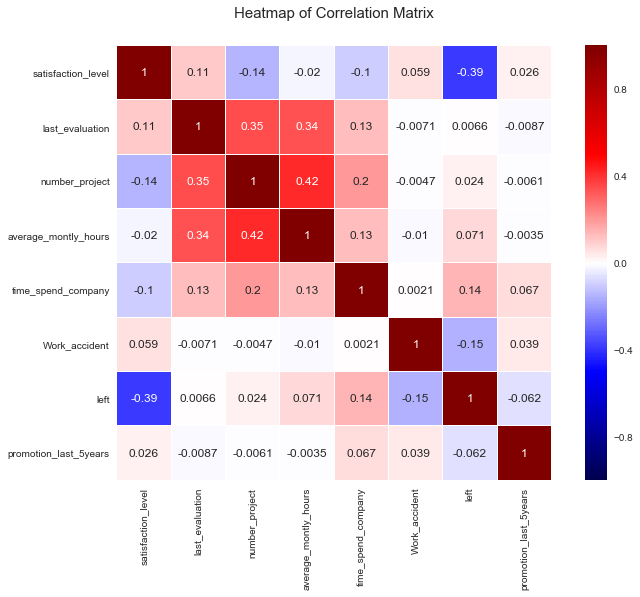

In [14]:
colormap = plt.cm.seismic
plt.figure(figsize=(12,8))
plt.title('Heatmap of Correlation Matrix', y=1.05, size=15)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

###  Feature Importance
***

#### Feature Importance via Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create dummy variables for the 'sales' and 'salary' features, since they are categorical 
sales = pd.get_dummies(data=hr_df.sales,drop_first=True,prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=hr_df.salary,drop_first=True,prefix='sal')
rf_data = hr_df
rf_data.drop(['sales','salary'],axis=1,inplace=True)
rf_data = pd.concat([rf_data,sales,salary],axis=1)

rf = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(rf_data.drop(['left'],axis=1), hr_df.left)
features = rf_data.drop(['left'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [16]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [17]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), reverse = False)))
trace2 = go.Bar(x=x , y=y, marker=dict(color=x, colorscale = 'Viridis', reversescale = True), name='Random Forest Feature importance', orientation='h',)
layout = dict(title='Barplot of Feature importances', width = 500, height = 500, yaxis=dict(showgrid=False, showline=False, showticklabels=True,))
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

***
#### Feature Importance via Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
       
gb = GradientBoostingClassifier(n_estimators=100, max_depth=4, min_samples_leaf=4, max_features=0.2, random_state=0)
gb.fit(rf_data.drop(['left'],axis=1), rf_data.left)
features = rf_data.drop(['left'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


In [19]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [20]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), reverse = False)))
trace2 = go.Bar(x=x , y=y, marker=dict(color=x, colorscale = 'Viridis', reversescale = True), name='Random Forest Feature importance', orientation='h',)
layout = dict(title='Barplot of Feature importances', width = 500, height = 500, yaxis=dict( showgrid=False, showline=False, showticklabels=True,))
fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')